# VRSJ AC 2020
Plot


Masahiro Furukawa
Aug 30, 2020

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df =  pd.read_excel("jikkenr200fps60all.xlsx",sheet_name='jikkenr200fps60',header=0)

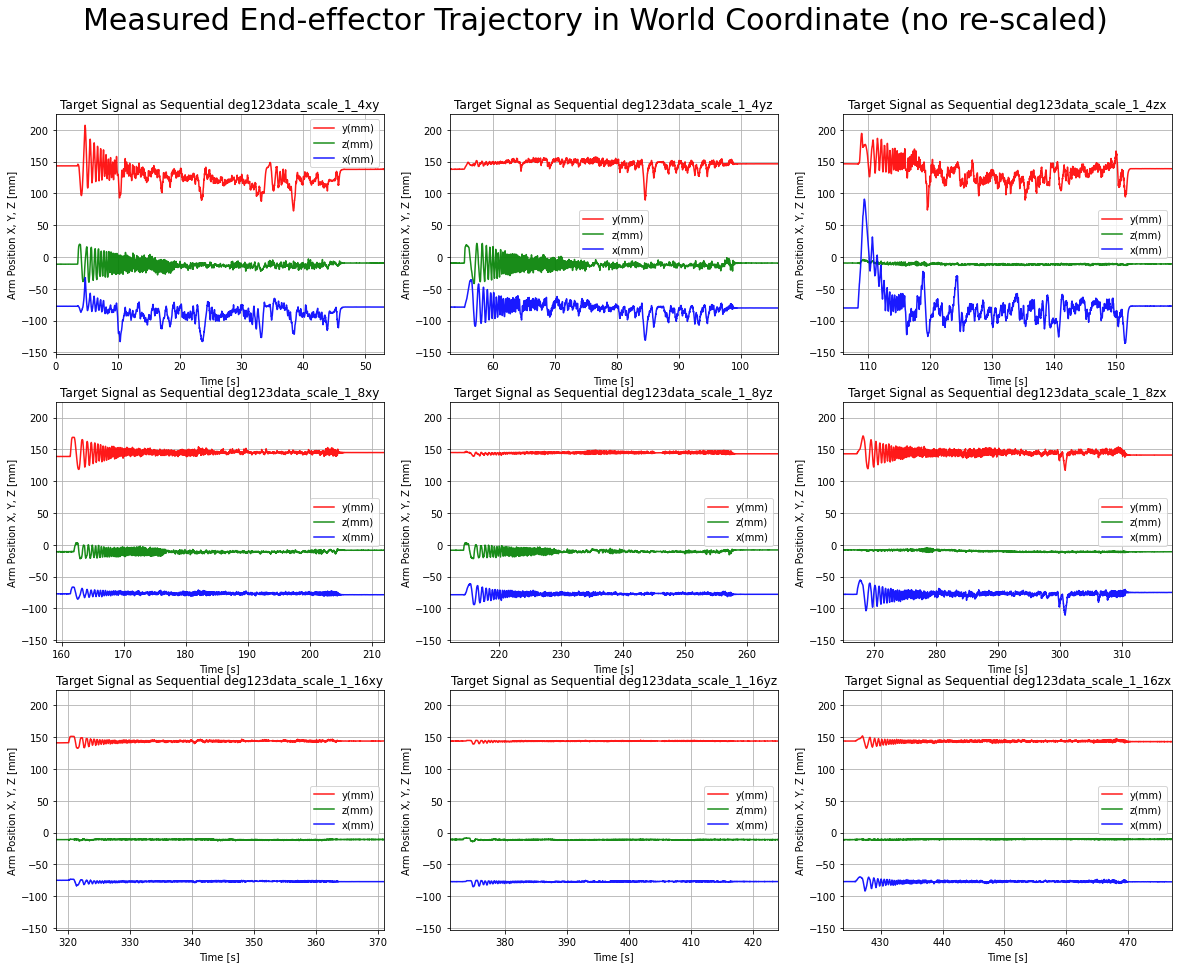

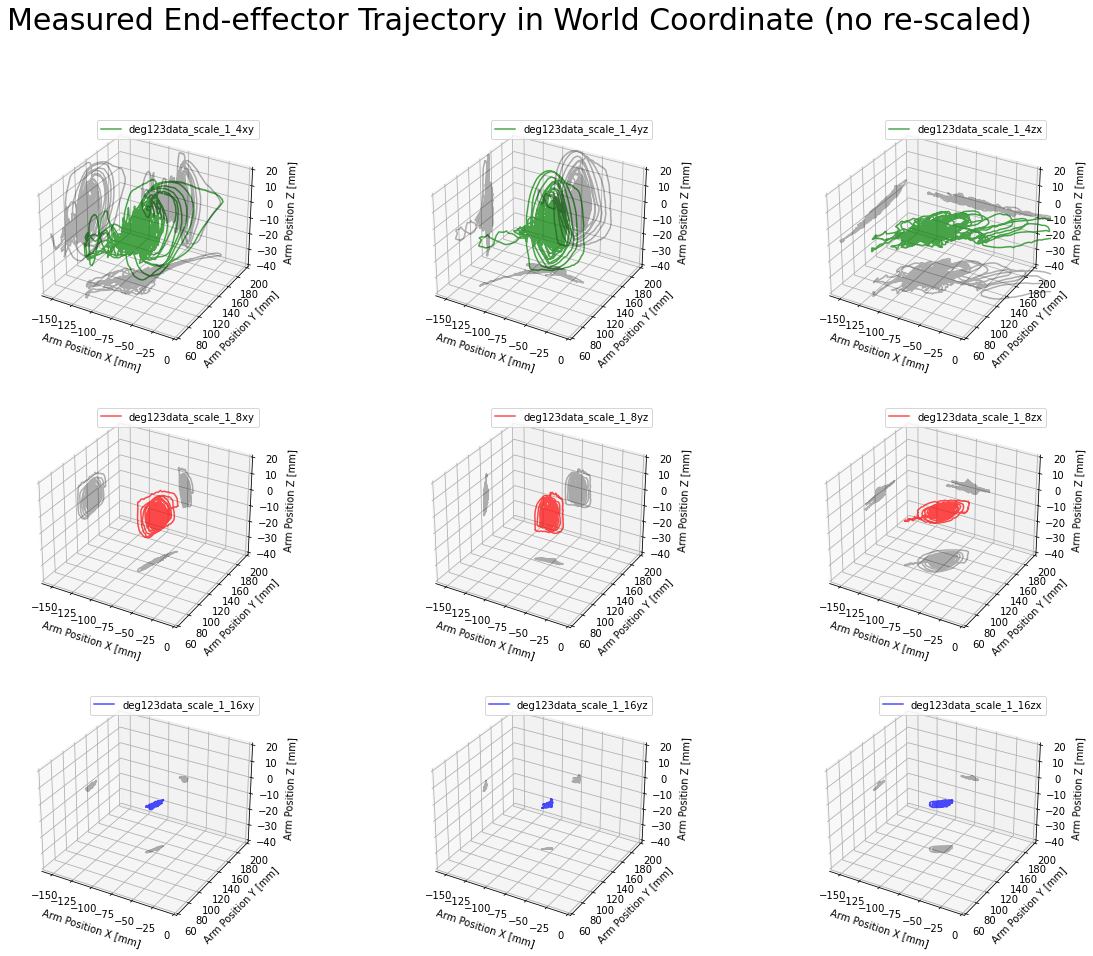

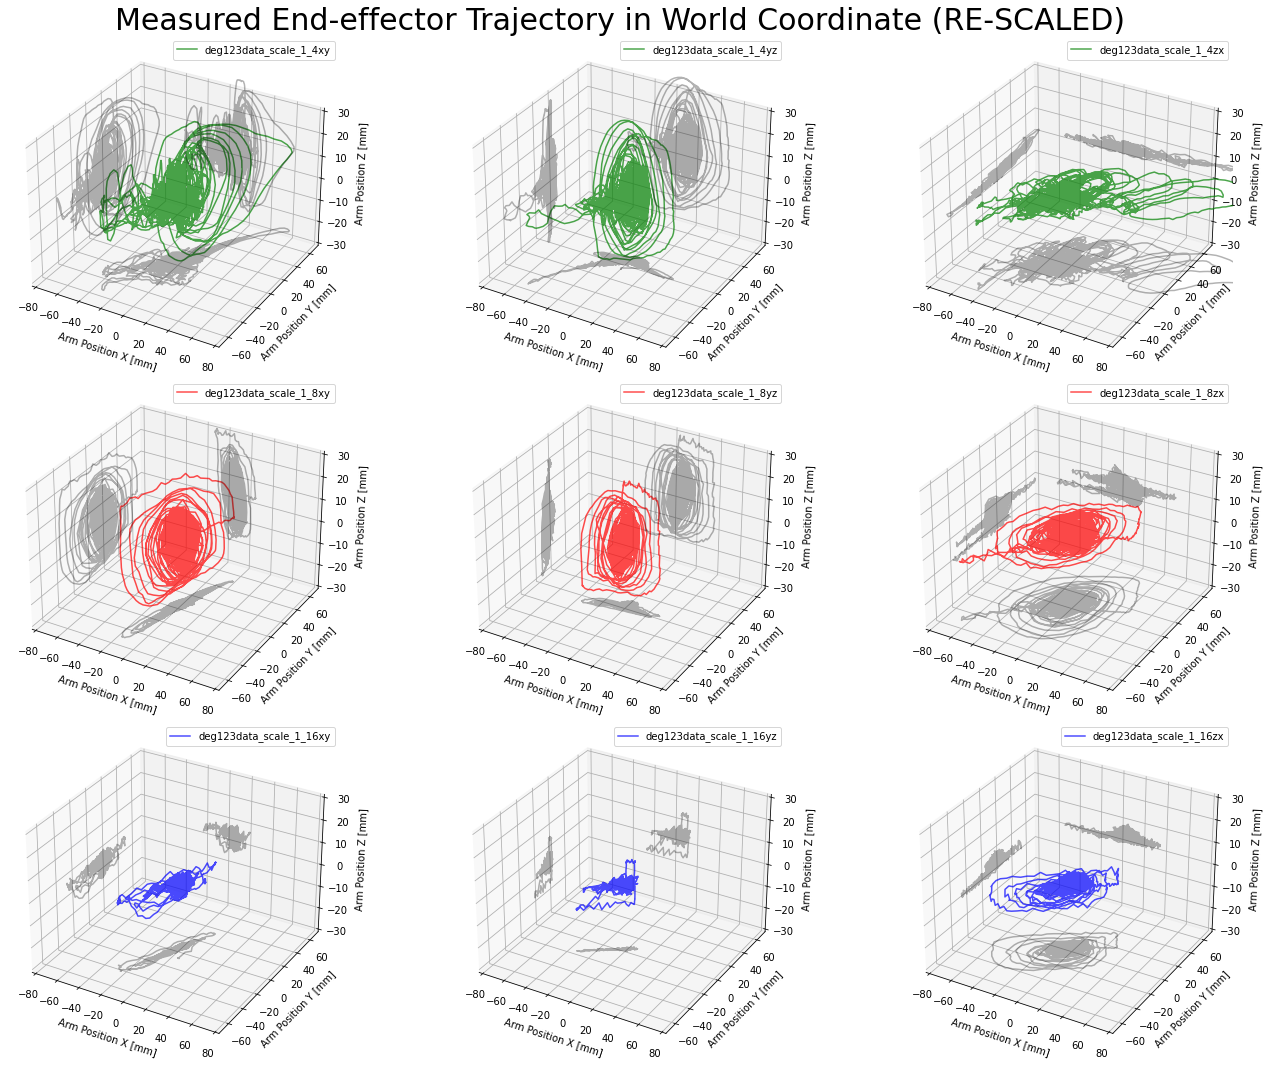

In [116]:
def setname(i):
    # implemented from 
    # https://github.com/maeda-lab/Scaledown/blob/master/simulation/simulation_realtime_Ji_sending/Source.cpp

    # Order of names created... 1/4xy,yz,zx 1/8xy,yz,zx  1/16xy,yz,zx
    # by using "if" ,"%",and "/"
    
    name = 'deg123data_scale_'

    if i % 3 == 0:
        space = "xy" 
        movespace = 0
    elif i % 3 == 1:
        space = "yz"
        movespace = 1
    else:
        space = "zx"
        movespace = 2

    if int(i / 3) == 0: 
        scalesize = "1_4"
        scale = 0.25
        c = 'g'
    elif int(i / 3) == 1:
        scalesize = "1_8"
        scale = 0.125
        c = 'r'
    else:
        scalesize = "1_16"
        scale = 0.0625
        c = 'b'

    return (name + scalesize + space , scale, c)

def plot_One(key_x, key_y, key_z):
    fps = 60
    n = len(df['x(mm)'])
    t = np.linspace(0,n,n)/fps
    
    deltaSec = 53
    
    nTrial = int(n/deltaSec/fps)
    
    fig = plt.figure(figsize=(20,15))
    fig.suptitle('Measured End-effector Trajectory in World Coordinate (no re-scaled)', fontsize=30)
        
    for s in range(nTrial):
        
        str,_,_ = setname(s)
        
        plt.subplot(3,3,s+1)
        plt.plot(t,df[key_y],'r-',alpha=0.9,label = key_y,markersize=3)
        plt.plot(t,df[key_z],'g-',alpha=0.9,label = key_z,markersize=3)
        plt.plot(t,df[key_x],'b-',alpha=0.9,label = key_x,markersize=3)
        plt.title('Target Signal as Sequential ' + str)
        plt.xlabel('Time [s]')
        plt.ylabel('Arm Position X, Y, Z [mm]')
#         plt.ylim([0,10])
        plt.xlim([s * deltaSec,s * deltaSec + deltaSec])
        plt.legend()
        plt.grid(True)

    
    fig = plt.figure(figsize=(20,15))
    fig.suptitle('Measured End-effector Trajectory in World Coordinate (no re-scaled)', fontsize=30)
    
    for s in range(nTrial):
        
        str, _, c = setname(s)
        
        ss = s*deltaSec*fps
        es = (s+1)*deltaSec*fps
        x = df[key_x][ss:es]
        y = df[key_y][ss:es]
        z = df[key_z][ss:es]
        
        ax = fig.add_subplot(331+s, projection='3d')
        ax.plot(x, y, z, c, alpha=0.7)

        ax.plot(x, z, 'k-', zdir='y', zs=200   ,alpha=0.3)
        ax.plot(y, z, 'k-', zdir='x', zs=-160  ,alpha=0.3)
        ax.plot(x, y, 'k-', zdir='z', zs=-40   ,alpha=0.3)

        # plt.title(str)
        ax.set_xlabel('Arm Position X [mm]')
        ax.set_ylabel('Arm Position Y [mm]')
        ax.set_zlabel('Arm Position Z [mm]')
        ax.set_xlim([-160, 0])
        ax.set_ylim([60, 200])
        ax.set_zlim([-40, 20])
        ax.legend([str])


    fig = plt.figure(figsize=(20,15))
    fig.suptitle('Measured End-effector Trajectory in World Coordinate (RE-SCALED)', fontsize=30)
    
    for s in range(nTrial):
        
        str, scale, c = setname(s)
        
        ss = s*deltaSec*fps
        es = (s+1)*deltaSec*fps
        x = ( df[key_x][ss:es] - np.mean(df[key_x][ss:es]) ) / scale / 4.0
        y = ( df[key_y][ss:es] - np.mean(df[key_y][ss:es]) ) / scale / 4.0
        z = ( df[key_z][ss:es] - np.mean(df[key_z][ss:es]) ) / scale / 4.0
        
        ax = fig.add_subplot(331+s, projection='3d')
        ax.plot(x, y, z, c, alpha=0.7)

        ax.plot(x, z, 'k-', zdir='y', zs=80   ,alpha=0.3)
        ax.plot(y, z, 'k-', zdir='x', zs=-70  ,alpha=0.3)
        ax.plot(x, y, 'k-', zdir='z', zs=-30   ,alpha=0.3)

        # plt.title(str)
        ax.set_xlabel('Arm Position X [mm]')
        ax.set_ylabel('Arm Position Y [mm]')
        ax.set_zlabel('Arm Position Z [mm]')
        ax.set_xlim([-80, 80])
        ax.set_ylim([-70, 70])
        ax.set_zlim([-30, 30])
        ax.legend([str])


    plt.tight_layout()
    plt.show()
    
plot_One('x(mm)','y(mm)','z(mm)')